<a href="https://colab.research.google.com/github/Tejas08wi/react/blob/main/doc_pat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install textblob

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Some general Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/gpt-4.csv", engine='python', on_bad_lines='skip')

In [ ]:
# read the first 3000 rows of the dataset
df.head(3000)

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."
...,...,...
2995,A 43-year-old female with dyspnoea was transfe...,Doctor: Good afternoon. You were transferred t...
2996,A 63-year-old female presented in 2016 with pa...,"Doctor: Hello, how are you feeling today?\nPat..."
2997,"A 72 year old female, with no significant past...","Doctor: Good morning, how are you feeling toda..."
2998,A 32-year-old female at pregnancy week 22 was ...,"Doctor: Hello, how are you feeling today?\nPat..."


In [ ]:
# Use df.sample() to randomly select 1000 rows for analysis.
dfs = df.sample(n=1000)
dfs.isnull().sum()

,0
data,0
conversation,0


Since we know that our dataset is clean and doesn't contain any duplicated or missing values we'll install the dependencies

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

EDA

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Text Length Analysis
dfs['conversation_length'] = dfs['conversation'].apply(lambda x: len(x.split()))  # Word count for conversation
dfs['data_length'] = dfs['data'].apply(lambda x: len(x.split()))  # Word count for data

Blue Distribution - represents conversation (300-400 words)

Red Distribution - represents data (200-300 words)

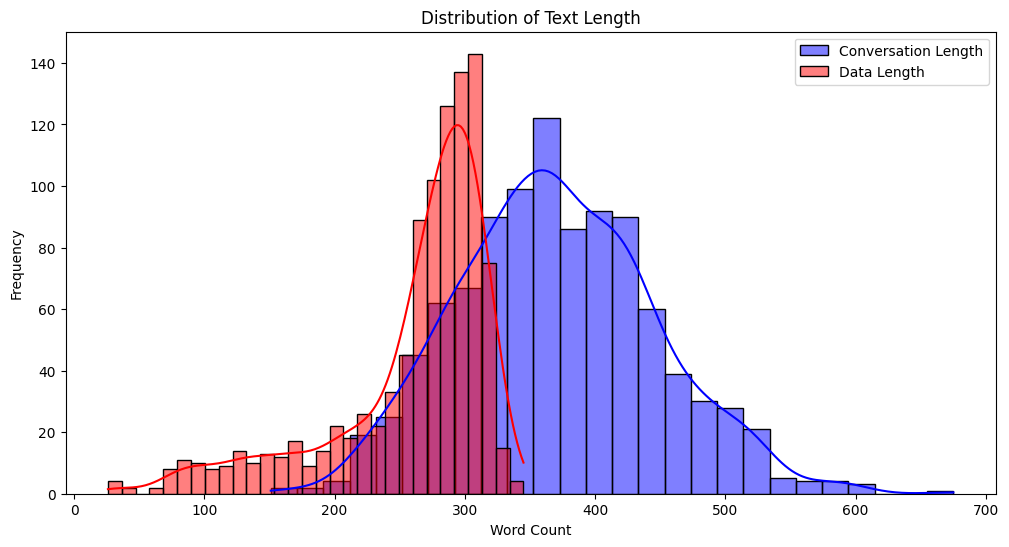

In [ ]:
# Plot the distribution of text length
plt.figure(figsize=(12, 6))
sns.histplot(dfs['conversation_length'], kde=True, color='blue', label='Conversation Length')
sns.histplot(dfs['data_length'], kde=True, color='red', label='Data Length')
plt.legend()
plt.title('Distribution of Text Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Word Cloud for Most Frequent Words in 'conversation'

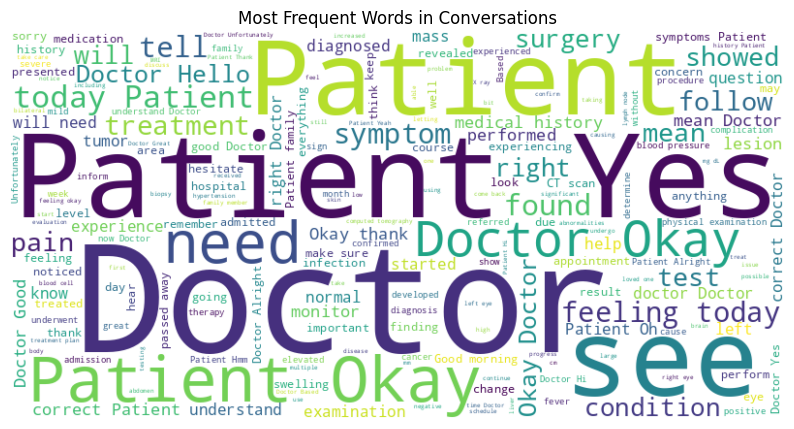

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dfs['conversation'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Conversations')
plt.show()

In [ ]:
# Basic Sentiment analysis
from textblob import TextBlob
# TextBlob will give us sentiment polarity between -1 to 1
dfs['sentiment'] = dfs['conversation'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

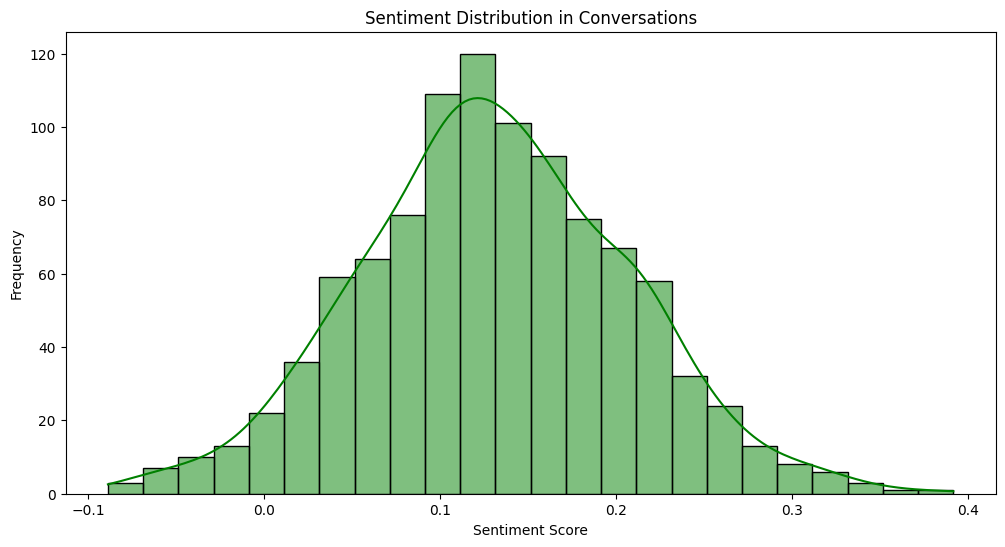

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(dfs['sentiment'], kde=True, color='green')
plt.title('Sentiment Distribution in Conversations')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

**NLP preprocessing**

Tokenizing

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Word Count in Conversations using spaCy for tokenization
dfs['conversation_word_count'] = dfs['conversation'].apply(lambda x: len([token.text for token in nlp(str(x))]))

# Summary of word count
print(f"Average words in conversation: {dfs['conversation_word_count'].mean()}")
print(f"Average words in summary: {dfs['data_length'].mean()}")

Average words in conversation: 485.494
Average words in summary: 260.272


In [ ]:
dfs.head()

,data,conversation,conversation_length,data_length,sentiment,conversation_word_count
2696,"A large-for-gestational-age, term male infant ...","Doctor: Hello, how are you feeling today?\nPat...",465,312,0.181582,589
2752,"Female patient aged 11 years and 2 months, pre...","Doctor: Hello, how can I help you today?\nPati...",332,238,0.209227,424
1730,A 46 year old male was an alcohol-intoxicated ...,"Doctor: Good morning, I'm Dr. Smith. How are y...",420,308,0.168674,511
1795,A 54-year-old male who had a medical history o...,"Doctor: Hello, how are you feeling today?\nPat...",297,268,0.049905,405
2283,A 69-year-old male was admitted to a hospital ...,"Doctor: Good morning, how are you feeling toda...",361,323,0.171247,440


Stemming

In [ ]:
import nltk
nltk.download('stopwords')

port_stem = PorterStemmer()
def stemming(content):
  stem_content = re.sub('[^a-zA-Z]', ' ', content)
  stem_content = stem_content.lower()
  stem_content = stem_content.split()
  stem_content = [port_stem.stem(word) for word in stem_content if not word in stopwords.words('english')]
  stem_content = ' '.join(stem_content)
  return stem_content

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dfs['stem_data'] = dfs['data'].apply(stemming)
dfs['stem_con'] = dfs['conversation'].apply(stemming)

In [ ]:
dfs.head()

,data,conversation,conversation_length,data_length,sentiment,conversation_word_count,stem_data,stem_con
2696,"A large-for-gestational-age, term male infant ...","Doctor: Hello, how are you feeling today?\nPat...",465,312,0.181582,589,larg gestat age term male infant born via spon...,doctor hello feel today patient alright thank ...
2752,"Female patient aged 11 years and 2 months, pre...","Doctor: Hello, how can I help you today?\nPati...",332,238,0.209227,424,femal patient age year month previous diagnos ...,doctor hello help today patient hi refer pedia...
1730,A 46 year old male was an alcohol-intoxicated ...,"Doctor: Good morning, I'm Dr. Smith. How are y...",420,308,0.168674,511,year old male alcohol intox restrain passeng h...,doctor good morn dr smith feel today patient g...
1795,A 54-year-old male who had a medical history o...,"Doctor: Hello, how are you feeling today?\nPat...",297,268,0.049905,405,year old male medic histori membran nephropath...,doctor hello feel today patient good feel wors...
2283,A 69-year-old male was admitted to a hospital ...,"Doctor: Good morning, how are you feeling toda...",361,323,0.171247,440,year old male admit hospit june right arm asth...,doctor good morn feel today patient feel okay ...


In [ ]:
dfs = dfs.drop(columns=['data', 'conversation'])

In [ ]:
dfs.head()

,conversation_length,data_length,sentiment,conversation_word_count,stem_data,stem_con
2696,465,312,0.181582,589,larg gestat age term male infant born via spon...,doctor hello feel today patient alright thank ...
2752,332,238,0.209227,424,femal patient age year month previous diagnos ...,doctor hello help today patient hi refer pedia...
1730,420,308,0.168674,511,year old male alcohol intox restrain passeng h...,doctor good morn dr smith feel today patient g...
1795,297,268,0.049905,405,year old male medic histori membran nephropath...,doctor hello feel today patient good feel wors...
2283,361,323,0.171247,440,year old male admit hospit june right arm asth...,doctor good morn feel today patient feel okay ...


Implemmenting 2nd problem statement

"Classify type of conversation like if it's a general query or emergency query"

In order to classify these queries we're using k-means clustering because we lack labels for our target variable

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# using TF-IDF vectorization for stemmed conversations to convert them into numerical values
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(dfs['stem_con'])

# Apply KMeans Clustering with 2 clusters (general, emergency)
kmeans = KMeans(n_clusters=2, random_state=42)
dfs['cluster'] = kmeans.fit_predict(X_tfidf)

# Inspect clustered results
for i in range(2):
    print(f"\nCluster {i} Sample Conversations:\n")
    print(dfs[dfs['cluster'] == i]['stem_con'].head(2))



Cluster 0 Sample Conversations:

1795    doctor hello feel today patient good feel wors...
30      doctor good morn feel today patient feel reall...
Name: stem_con, dtype: object

Cluster 1 Sample Conversations:

2696    doctor hello feel today patient alright thank ...
2752    doctor hello help today patient hi refer pedia...
Name: stem_con, dtype: object


In [ ]:
# Manually map clusters to labels
cluster_to_label = {0: 'General Query', 1: 'Emergency Query'}
dfs['label'] = dfs['cluster'].map(cluster_to_label)

So,

Cluster 0 - General Query

Cluster 1 - Emergency Query




In [ ]:
dfs.head()

,conversation_length,data_length,sentiment,conversation_word_count,stem_data,stem_con,cluster,label
2696,465,312,0.181582,589,larg gestat age term male infant born via spon...,doctor hello feel today patient alright thank ...,1,Emergency Query
2752,332,238,0.209227,424,femal patient age year month previous diagnos ...,doctor hello help today patient hi refer pedia...,1,Emergency Query
1730,420,308,0.168674,511,year old male alcohol intox restrain passeng h...,doctor good morn dr smith feel today patient g...,1,Emergency Query
1795,297,268,0.049905,405,year old male medic histori membran nephropath...,doctor hello feel today patient good feel wors...,0,General Query
2283,361,323,0.171247,440,year old male admit hospit june right arm asth...,doctor good morn feel today patient feel okay ...,1,Emergency Query


Here, we're converting the text data into numerical data and training our classification model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preparing features (X) and target variable (y)
X = dfs[['conversation_length', 'data_length', 'sentiment', 'conversation_word_count', 'stem_data', 'stem_con']]
y = dfs['cluster']  # Target variable which is already in a numerical form

# Convert text data into numerical data
vectorizer = TfidfVectorizer()
X_stemmed = vectorizer.fit_transform(X['stem_con'])

# Combine the numerical features with the TF-IDF features
from scipy.sparse import hstack
X_final = hstack([X.drop(columns=['stem_data', 'stem_con']).values, X_stemmed])

# Split the data into train and test sets in order to train our model
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier --> To deal with new data
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.77      0.81        79
           1       0.86      0.92      0.89       121

    accuracy                           0.86       200
   macro avg       0.86      0.84      0.85       200
weighted avg       0.86      0.86      0.86       200

[[ 61  18]
 [ 10 111]]


In [ ]:
dfs.head()

,conversation_length,data_length,sentiment,conversation_word_count,stem_data,stem_con,cluster,label
2696,465,312,0.181582,589,larg gestat age term male infant born via spon...,doctor hello feel today patient alright thank ...,1,Emergency Query
2752,332,238,0.209227,424,femal patient age year month previous diagnos ...,doctor hello help today patient hi refer pedia...,1,Emergency Query
1730,420,308,0.168674,511,year old male alcohol intox restrain passeng h...,doctor good morn dr smith feel today patient g...,1,Emergency Query
1795,297,268,0.049905,405,year old male medic histori membran nephropath...,doctor hello feel today patient good feel wors...,0,General Query
2283,361,323,0.171247,440,year old male admit hospit june right arm asth...,doctor good morn feel today patient feel okay ...,1,Emergency Query


In [ ]:
"""Improve Clustering with Domain-Specific Keywords"""
# def rule_based_label(text):
#     if any(word in text for word in ['urgent', 'emergency', 'immediately', 'severe']):
#         return 'Emergency Query'
#     else:
#         return 'General Query'

# dfs['rule_label'] = dfs['stem_con'].apply(rule_based_label)

'Improve Clustering with Domain-Specific Keywords'

Identifying illnesses and correlating them with issues like weakness or difficulty in daily activities (3rd problem statement)

In [ ]:
"""we are using NER here"""

nlp = spacy.load('en_core_web_sm')

# Function to extract illnesses from text using NER
def extract_illnesses(text):
    doc = nlp(text)
    illnesses = []
    for ent in doc.ents:
        if ent.label_ == "DISEASE":  # spaCy's entity label for diseases/illnesses
            illnesses.append(ent.text.lower())  # Converting to lowercase for consistency
    return illnesses

# Apply the function to extract illnesses from 'conversation' column
df['illnesses'] = df['data'].apply(extract_illnesses)


In [ ]:
"""Correlating with other issues"""
keywords = ['weakness', 'fatigue', 'tired', 'unable to move', 'chest pain']

# Function to check if any of the symptoms are mentioned in the conversation
def correlate_weakness_or_difficulty(text):
    return any(keyword in text.lower() for keyword in keywords)

# Apply the function to check if symptoms are mentioned
df['has_weakness_or_difficulty'] = df['data'].apply(correlate_weakness_or_difficulty)


In [ ]:
severe_illnesses = ['cancer', 'diabetes', 'hypertension', 'flu', 'asthma', 'heart disease', 'stroke']

# Function to check for severe illnesses in the conversation text
def extract_severe_illness_from_keywords(text):
    illnesses_found = [illness for illness in severe_illnesses if illness in text.lower()]
    return illnesses_found

# Apply the function to detect severe illnesses in the conversation
df['severe_illnesses'] = df['data'].apply(extract_severe_illness_from_keywords)

# Now, create a primary illness from the detected severe illness
df['primary_illness'] = df['severe_illnesses'].apply(lambda x: x[0] if x else 'No Illness')


This correlation shows how these illnesses are linked to such physical challenges, it also helps to uncover the relationship between disease and symptoms which helps to improve diagnosis

In [ ]:
# Calculate the correlation between severe illness and has_weakness_or_difficulty
correlation = df.groupby('primary_illness')['has_weakness_or_difficulty'].mean()

# This helps us understand the relationship between the diseases and symptoms
print("\nCorrelation between Severe Illness and Difficulties:")
print(correlation)


Correlation between Severe Illness and Difficulties:
primary_illness
No Illness       0.152281
asthma           0.310345
cancer           0.100629
diabetes         0.259928
flu              0.160377
heart disease    0.500000
hypertension     0.247104
stroke           0.428571
Name: has_weakness_or_difficulty, dtype: float64


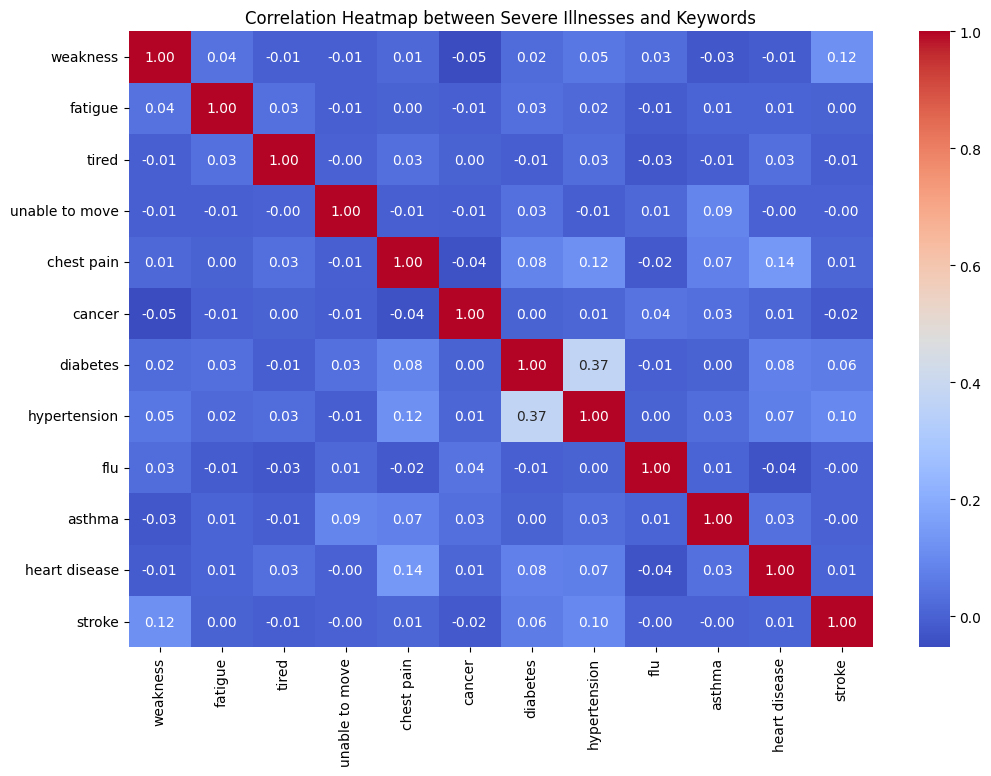

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example of binary encoding for keywords
for keyword in keywords:
    df[keyword] = df['data'].str.contains(keyword, case=False).astype(int)

# Example of binary encoding for severe illnesses
for illness in severe_illnesses:
    df[illness] = df['data'].str.contains(illness, case=False).astype(int)

# Combine keyword and illness columns for correlation analysis
correlation_columns = keywords + severe_illnesses
correlation_matrix = df[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    xticklabels=correlation_columns,
    yticklabels=correlation_columns
)
plt.title("Correlation Heatmap between Severe Illnesses and Keywords")
plt.show()